![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Tarea 4: Regresión lineal Simple Formas Funcionales**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
31 de octubre de 2024


# Auto reload modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scripts.index as index
from scipy.stats import t
from scipy import stats
import fs

In [4]:
MAIN_DIR = fs.open_fs("../../data/raw/HW04")
XLSX_DIR = MAIN_DIR.getsyspath("Tabla_Tarea_FF.xlsx")

In [42]:
DIR = fs.open_fs(".")
NB_DIR = DIR.getsyspath("0.0-leng-HW04.ipynb")

# Extrae los encabezados y genera el índice
headings = index.extract_headings(NB_DIR)
toc = index.generate_toc(headings)

# Muestra el índice generado
# print(toc)

- [**Tarea 4: Regresión lineal Simple Formas Funcionales**](#**tarea-4:-regresión-lineal-simple-formas-funcionales**)
  - [**Asignatura:** Econometría](#**asignatura:**-econometría)
  - [**Profesora:** Mae. Julieta María Sarralde](#**profesora:**-mae.-julieta-maría-sarralde)
- [Auto reload modules](#auto-reload-modules)
  - [Ejercicio](#ejercicio)
    - [Modelo Elasticidad constante – Tabla 1 (Ahorro – Inversión en EUA)](#modelo-elasticidad-constante-–-tabla-1-(ahorro-–-inversión-en-eua))
      - [Elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdd originales y transformadas](#elabore-un-diagrama-de-dispersión-con-las-variables-inversión-y-nivel-de-ahorro-en-mdd-originales-y-transformadas)
      - [Obtenga el intervalo de probabilidad al 95% para el pronostico de la inversión cuando el ahorro es de $200 mdd](#obtenga-el-intervalo-de-probabilidad-al-95%-para-el-pronostico-de-la-inversión-cuando-el-ahorro-es-de-$200-mdd)
      - [Obtenga el intervalo de confianza al 95% para la elasticidad de la inversión por el ahorro y interprete sus resultados](#obtenga-el-intervalo-de-confianza-al-95%-para-la-elasticidad-de-la-inversión-por-el-ahorro-y-interprete-sus-resultados)
    - [Modelo de rendimientos decrecientes – Tabla 2 (Ahorro – Inversión en Francia)](#modelo-de-rendimientos-decrecientes-–-tabla-2-(ahorro-–-inversión-en-francia))
      - [Elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mde originales y transformadas](#elabore-un-diagrama-de-dispersión-con-las-variables-inversión-y-nivel-de-ahorro-en-mde-originales-y-transformadas)
      - [Pruebe la validez estadística de la siguiente afirmación: “La inversión aumentara en mas de 1 mde ante un incremento del 1% en el nivel de ahorro en Francia.” (Utilice un nivel de significancia del 5%)](#pruebe-la-validez-estadística-de-la-siguiente-afirmación:-“la-inversión-aumentara-en-mas-de-1-mde-ante-un-incremento-del-1%-en-el-nivel-de-ahorro-en-francia.”-(utilice-un-nivel-de-significancia-del-5%))
    - [Modelo de crecimiento exponencial – Tabla 3 (Ahorro – Inversión México)](#modelo-de-crecimiento-exponencial-–-tabla-3-(ahorro-–-inversión-méxico))
      - [Estime el modelo y elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdpmxn originales y transformadas](#estime-el-modelo-y-elabore-un-diagrama-de-dispersión-con-las-variables-inversión-y-nivel-de-ahorro-en-mdpmxn-originales-y-transformadas)
    - [Modelo Recíproco – Tabla 4 (Ahorro- Inversión Colombia)](#modelo-recíproco-–-tabla-4-(ahorro--inversión-colombia))
      - [Estime el modelo y elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdpcop originales y transformadas](#estime-el-modelo-y-elabore-un-diagrama-de-dispersión-con-las-variables-inversión-y-nivel-de-ahorro-en-mdpcop-originales-y-transformadas)
      - [Pruebe la validez estadística de la siguiente afirmación: “Si el nivel de ahorro es muy grande el nivel de inversión no superara los 60,000 mdcop  en Colombia” (Utilice un nivel de significancia del 5%)](#pruebe-la-validez-estadística-de-la-siguiente-afirmación:-“si-el-nivel-de-ahorro-es-muy-grande-el-nivel-de-inversión-no-superara-los-60,000-mdcop--en-colombia”-(utilice-un-nivel-de-significancia-del-5%))
      - [Si se tiene un ahorro e inversión de:](#si-se-tiene-un-ahorro-e-inversión-de:)

## Ejercicio 

De la información del archivo FF utilice las tablas correspondientes aplicar las siguientes técnicas: 

### Modelo Elasticidad constante – Tabla 1 (Ahorro – Inversión en EUA)

#### Elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdd originales y transformadas

In [6]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [7]:
df = pd.read_excel(XLSX_DIR , header=0, sheet_name='tabla 1')
df

,t,ahorro,inversión
0,0,13599,87957
1,1,4699,23578
2,2,5473,16345
3,3,6119,6550
4,4,8811,10230
5,5,1142,9127
6,6,143,1675
7,7,138,1110
8,8,85,3351
9,9,108,1140


Definición de modelos de formas funcionales.

In [8]:
# Elasticidad constante:
def Elasticidad_cte(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de elasticidad constante, también conocido como
    modelo log-log lineal.

    Este modelo es adecuado para situaciones en las que se desea calcular un valor basado
    en una relación logarítmica entre la variable independiente y la dependiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 * log(x)).

    Ejemplo:
    >>> Elasticidad_cte(1, 2, 10)
    220.26431718005027
    """
    return np.exp(b0 + b1 * np.log(x))

def Rendimientos_dec(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de rendimientos decrecientes o de saturación
    (modelo Lin-Log).

    Este modelo se usa para describir situaciones en las que el incremento en la variable
    independiente provoca una disminución en el ritmo de crecimiento de la variable dependiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula b0 + b1 * log(x).

    Ejemplo:
    >>> Rendimientos_dec(2, 0.5, 10)
    3.5
    """
    return b0 + b1 * np.log(x)

def Crecimiento_exp(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de crecimiento exponencial (modelo Log-lin).

    Este modelo es adecuado para situaciones en las que la variable dependiente crece de
    manera exponencial en función de la variable independiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo en el logaritmo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo logarítmico.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 * log(x)).

    Ejemplo:
    >>> Crecimiento_exp(1, 0.2, 10)
    1.2214027581601699
    """
    return np.exp(b0 + b1 * np.log(x))

def Reciproco(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo recíproco, también conocido como curva de experiencia.

    Este modelo se usa para situaciones en las que el efecto de la variable independiente
    disminuye conforme aumenta la variable independiente.

    Parámetros:
    - b0 (float | int): Intercepto del modelo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo recíproco.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula b0 + b1 / x.

    Ejemplo:
    >>> Reciproco(10, 5, 2)
    12.5
    """
    return b0 + b1 / x

def Ciclo_vida(b0: float | int, b1: float | int, x: float | int) -> float:
    """
    Calcula el valor utilizando un modelo de ciclo de vida o 'S' (modelo log recíproco).

    Este modelo se usa para describir el crecimiento o evolución en fases, donde la variable
    dependiente se ajusta de acuerdo con una función logarítmica de la variable independiente
    recíproca.

    Parámetros:
    - b0 (float | int): Intercepto del modelo en el logaritmo.
    - b1 (float | int): Coeficiente de la pendiente en el modelo recíproco.
    - x (float | int): Valor de la variable independiente para el cálculo.

    Retorna:
    - float: Valor calculado utilizando la fórmula exp(b0 + b1 / x).

    Ejemplo:
    >>> Ciclo_vida(1, 3, 4)
    20.085536923187668
    """
    return np.exp(b0 + b1 / x)

# def Estandarizado(b0 : float | int, b1 : float | int, x : float | int,) -> float:
#     """ Modelo estandarizado"""
#     return np.exp(b0 + b1/x)

In [9]:
df['log_ahorro'] = np.log(df['ahorro'])
df['log_inv'] = np.log(df['inversión'])

In [10]:
df

,t,ahorro,inversión,log_ahorro,log_inv
0,0,13599,87957,9.517752,11.384603
1,1,4699,23578,8.455105,10.068069
2,2,5473,16345,8.607582,9.701677
3,3,6119,6550,8.719154,8.787220
4,4,8811,10230,9.083756,9.233080
5,5,1142,9127,7.040536,9.118992
6,6,143,1675,4.962845,7.423568
7,7,138,1110,4.927254,7.012115
8,8,85,3351,4.442651,8.117014
9,9,108,1140,4.682131,7.038784


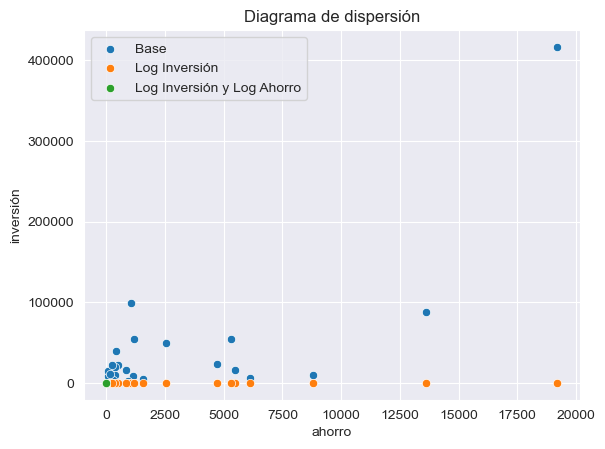

In [11]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the first scatter plot
sns.scatterplot(data=df, x='ahorro', y='inversión', ax=ax, label='Base')

# Plot the second scatter plot
sns.scatterplot(data=df, x='ahorro', y='log_inv', ax=ax, label='Log Inversión')

# Plot the third scatter plot
sns.scatterplot(data=df, x='log_ahorro', y='log_inv', ax=ax, label='Log Inversión y Log Ahorro')

# Add a legend to the plot
ax.legend()

# Add title
plt.title('Diagrama de dispersión')

# Display the plot
plt.show()

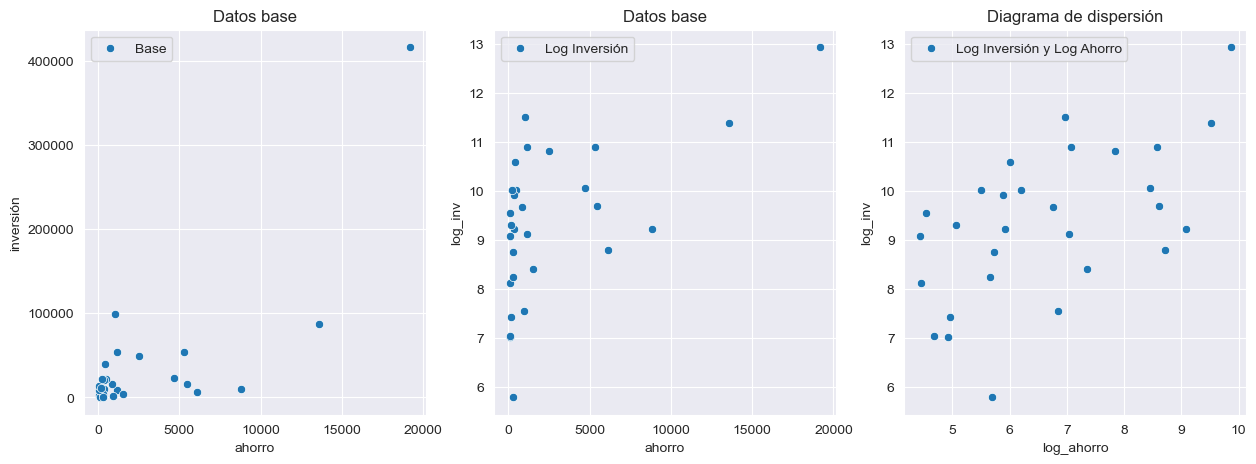

In [12]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first scatter plot
sns.scatterplot(data=df, x='ahorro', y='inversión', ax=ax[0], label='Base')
ax[0].set_title("Datos base")

# Plot the second scatter plot
sns.scatterplot(data=df, x='ahorro', y='log_inv', ax=ax[1], label='Log Inversión')
ax[1].set_title("Datos base")

# Plot the third scatter plot
sns.scatterplot(data=df, x='log_ahorro', y='log_inv', ax=ax[2], label='Log Inversión y Log Ahorro')
ax[2].set_title("Datos base")

# Add title
plt.title('Diagrama de dispersión')

# Display the plot
plt.show()

Regresión lineal simple al data set original

In [13]:
model_base= (
    smf.ols(
        formula='inversión~ahorro',
        data=df
    )
    .fit()
)

In [14]:
model_base.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.579     
Dependent Variable: inversión        AIC:                712.1986  
Date:               2024-09-01 11:18 BIC:                714.9332  
No. Observations:   29               Log-Likelihood:     -354.10   
Df Model:           1                F-statistic:        39.47     
Df Residuals:       27               Prob (F-statistic): 1.01e-06  
R-squared:          0.594            Scale:              2.5369e+09
-------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
Intercept  170.1363 10878.8837 0.0156 0.9876 -22151.4893 22491.7618
ahorro      13.3138     2.1191 6.2827 0.0000      8.9658    17.6619
-------------------------------------------------------------------
Omnibus:               9.861        Durbin-Watson:           1.138 
Prob(Omnibus):         0.007        Jarque-Bera (JB):        13.123
Skew:                  0.650        Prob(JB):                0.001 
Kurtosis:              6.028        Condition No.:           5971  
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

Regresión lineal simple al dataset del logaritmo

In [15]:
b1_base : float = model_base.params['ahorro']
b0_base : float = model_base.params['Intercept']
print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1_base:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0_base:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = 13.3138
El estimador de la eslasticidad = b0 = intercept = 170.1363


In [16]:
model_log= (
    smf.ols(
        formula='log_inv~log_ahorro',
        data=df
    )
    .fit()
)

In [17]:
model_log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.305   
Dependent Variable: log_inv          AIC:                99.0171 
Date:               2024-09-01 11:18 BIC:                101.7517
No. Observations:   29               Log-Likelihood:     -47.509 
Df Model:           1                F-statistic:        13.26   
Df Residuals:       27               Prob (F-statistic): 0.00113 
R-squared:          0.329            Scale:              1.6653  
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     5.7309     1.0219   5.6083   0.0000   3.6343   7.8276
log_ahorro    0.5456     0.1498   3.6418   0.0011   0.2382   0.8530
-----------------------------------------------------------------
Omnibus:               1.331        Durbin-Watson:          1.456
Prob(Omnibus):         0.514        Jarque-Bera (JB):       1.263
Skew:                  -0.419       Prob(JB):               0.532
Kurtosis:              2.415        Condition No.:          30   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [18]:
b1_log : float = model_log.params['log_ahorro']
b0_log : float = model_log.params['Intercept']
print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1_log:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0_log:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = 0.5456
El estimador de la eslasticidad = b0 = intercept = 5.7309


#### Obtenga el intervalo de probabilidad al 95% para el pronostico de la inversión cuando el ahorro es de $200 mdd 

In [19]:
ahorro = 200
prediccion = model_log.get_prediction(pd.DataFrame({'log_ahorro': [np.log(ahorro)]}))

# Obtener el intervalo de predicción al 95% de confianza
int_conf_perc = 0.95
int_conf = prediccion.conf_int(obs=True, alpha=1-int_conf_perc)[0]

# Regresar a valores base.
int_conf_base = np.exp(int_conf)
print(f"Intervalo de confianza a un {int_conf_perc*100}% en la predicción: ({int_conf_base[0]:,.4f}, {int_conf_base[1]:,.4f})")

Intervalo de confianza a un 95.0% en la predicción: (364.1562, 84,605.4014)


#### Obtenga el intervalo de confianza al 95% para la elasticidad de la inversión por el ahorro y interprete sus resultados 

In [20]:
int_conf_perc = 0.95
int_elasticidad = model_log.conf_int(alpha=1-int_conf_perc).loc['log_ahorro'].values
print(f"Intervalo de confianza a un {int_conf_perc*100}% en de elasticidad: ({int_elasticidad[0]:_.4f}, {int_elasticidad[1]:_.4f})")

Intervalo de confianza a un 95.0% en de elasticidad: (0.2382, 0.8530)


### Modelo de rendimientos decrecientes – Tabla 2 (Ahorro – Inversión en Francia)

#### Elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mde originales y transformadas

In [21]:
df2 = pd.read_excel(XLSX_DIR , header=0, sheet_name='tabla 2')
df2.rename(columns={"inversión EUR": "inversión"}, inplace=True)
df2['log_ahorro'] = np.log(df2['ahorro'])
df2

,t,ahorro,inversión,log_ahorro
0,0,13599,87.957,9.517752
1,1,4699,23.578,8.455105
2,2,5473,16.345,8.607582
3,3,6119,6.550,8.719154
4,4,8811,10.230,9.083756
5,5,1142,9.127,7.040536
6,6,143,1.675,4.962845
7,7,138,1.110,4.927254
8,8,85,3.351,4.442651
9,9,108,1.140,4.682131


Text(0.5, 1.0, 'Diagrama de dispersión')

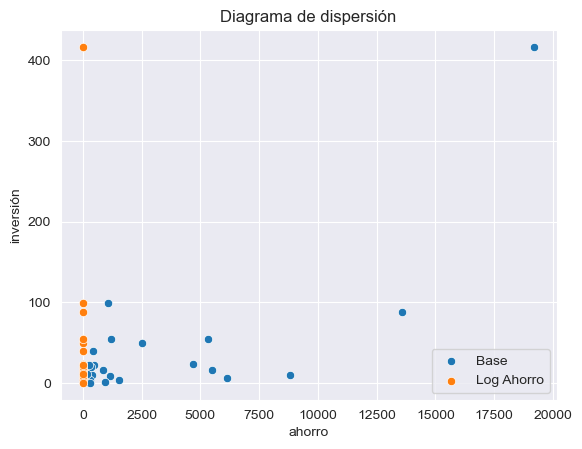

In [22]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the first scatter plot
sns.scatterplot(data=df2, x='ahorro', y='inversión', ax=ax, label='Base')

# Plot the second scatter plot
sns.scatterplot(data=df2, x='log_ahorro', y='inversión', ax=ax, label='Log Ahorro')

# Add a legend to the plot
ax.legend()

# Add title and labels
ax.set_title('Diagrama de dispersión')

Text(0.5, 0.98, 'Diagrama de dispersión')

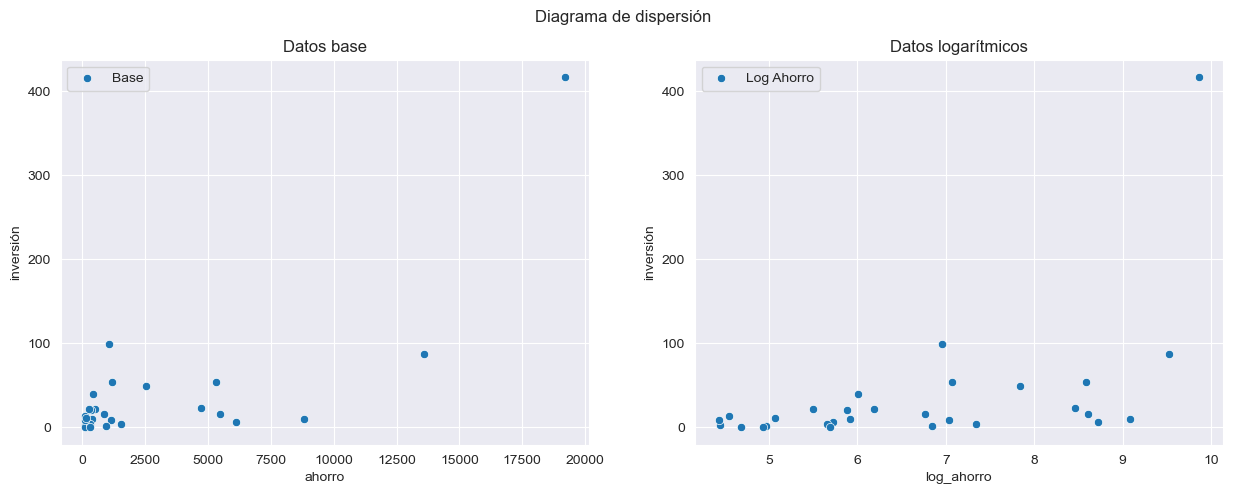

In [23]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first scatter plot
sns.scatterplot(data=df2, x='ahorro', y='inversión', ax=ax[0], label='Base')
ax[0].set_title("Datos base")

# Plot the second scatter plot
sns.scatterplot(data=df2, x='log_ahorro', y='inversión', ax=ax[1], label='Log Ahorro')
ax[1].set_title("Datos logarítmicos")

# Set a general title for the figure
fig.suptitle('Diagrama de dispersión')

In [24]:
model_df2= (
    smf.ols(
        formula='inversión~log_ahorro',
        data=df2
    )
    .fit()
)
model_df2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.223   
Dependent Variable: inversión        AIC:                329.2959
Date:               2024-09-01 11:18 BIC:                332.0305
No. Observations:   29               Log-Likelihood:     -162.65 
Df Model:           1                F-statistic:        9.047   
Df Residuals:       27               Prob (F-statistic): 0.00564 
R-squared:          0.251            Scale:              4678.3  
-----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-----------------------------------------------------------------
Intercept    -123.2857  54.1605 -2.2763 0.0310 -234.4138 -12.1576
log_ahorro     23.8832   7.9403  3.0078 0.0056    7.5910  40.1753
-----------------------------------------------------------------
Omnibus:             47.470       Durbin-Watson:          1.573  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       247.346
Skew:                3.193        Prob(JB):               0.000  
Kurtosis:            15.803       Condition No.:          30     
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [25]:
b1_df2 : float = model_df2.params['log_ahorro']
b0_df2 : float = model_df2.params['Intercept']
print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1_df2:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0_df2:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = 23.8832
El estimador de la eslasticidad = b0 = intercept = -123.2857


#### Pruebe la validez estadística de la siguiente afirmación: “La inversión aumentara en mas de 1 mde ante un incremento del 1% en el nivel de ahorro en Francia.” (Utilice un nivel de significancia del 5%) 

El valor del estadístico t es: (utilice 4 decimales)

La variación de Y en relación con la variación de X en un modelo de rendimiento decreciente se puede expresar como:

$$
\Delta Y = \beta_1 \frac{\Delta X}{X}
$$

Por lo tanto, podemos reformular la afirmación de la siguiente manera:

$$
\beta_1 \times 0.01 > 1 \\
\beta_1 > 100
$$

La hipótesis nula ($H_0$) y la hipótesis alternativa ($H_1$) se plantean así:
$H_0: \beta_1 \leq 100$ vs $H_1: \beta_1 > 100$

In [26]:
se_x_df2 = model_df2.bse['log_ahorro']
t_value = (b1_df2 - 100) / se_x_df2

p_value = 1 - t.cdf(t_value, df=model_df2.df_resid)

print(f"Valor del estadístico t: {t_value:.4f}")
print(f"Valor p: {p_value:.4f}")

Valor del estadístico t: -9.5861
Valor p: 1.0000


In [27]:
if  p_value < 0.05 :
    print("Se rechaza H0")
else:
    print("Se acepta H0")

Se acepta H0


### Modelo de crecimiento exponencial – Tabla 3 (Ahorro – Inversión México)

####  Estime el modelo y elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdpmxn originales y transformadas

In [28]:
df3 = pd.read_excel(XLSX_DIR , header=0, sheet_name='tabla 3')
df3.rename(columns={"inversión MXN": "inversión"}, inplace=True)
df3['log_inv'] = np.log(df3['inversión'])
df3

,t,ahorro,inversión,log_inv
0,0,13599,879.57,6.779433
1,1,4699,235.78,5.462899
2,2,5473,163.45,5.096507
3,3,6119,65.50,4.182050
4,4,8811,102.30,4.627910
5,5,1142,91.27,4.513822
6,6,143,16.75,2.818398
7,7,138,11.10,2.406945
8,8,85,33.51,3.511844
9,9,108,11.40,2.433613


Text(0.5, 1.0, 'Diagrama de dispersión')

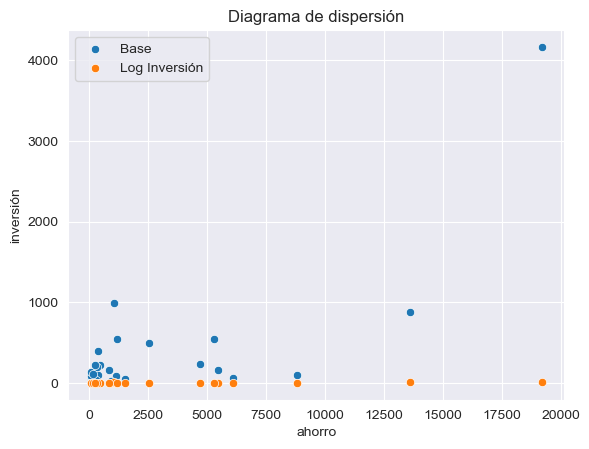

In [29]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the first scatter plot
sns.scatterplot(data=df3, x='ahorro', y='inversión', ax=ax, label='Base')

# Plot the second scatter plot
sns.scatterplot(data=df3, x='ahorro', y='log_inv', ax=ax, label='Log Inversión')

# Add a legend to the plot
ax.legend()

# Add title and labels
ax.set_title('Diagrama de dispersión')

Text(0.5, 0.98, 'Diagrama de dispersión')

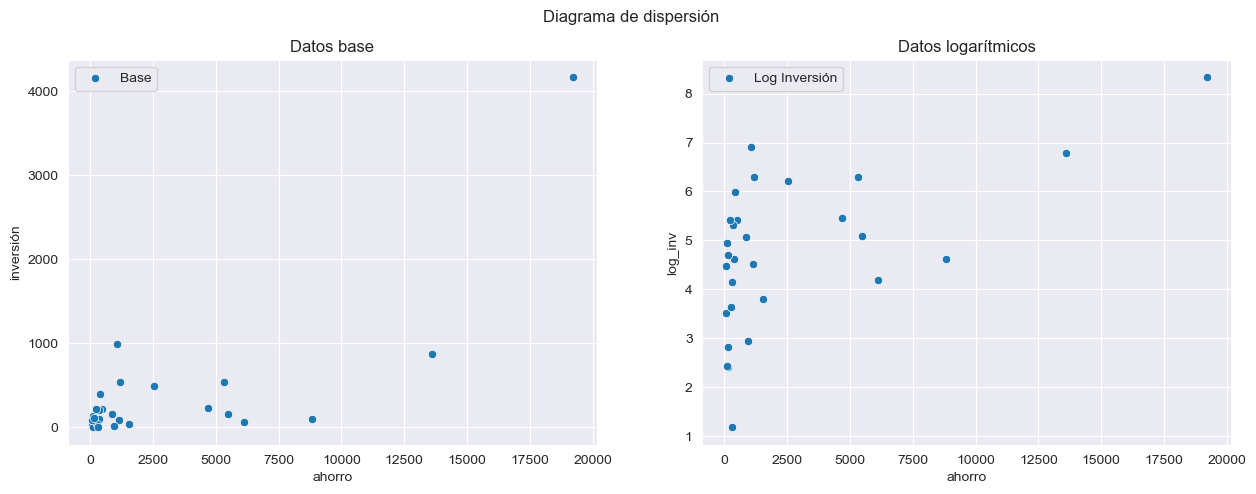

In [30]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first scatter plot
sns.scatterplot(data=df3, x='ahorro', y='inversión', ax=ax[0], label='Base')
ax[0].set_title("Datos base")

# Plot the second scatter plot
sns.scatterplot(data=df3, x='ahorro', y='log_inv', ax=ax[1], label='Log Inversión')
ax[1].set_title("Datos logarítmicos")

# Set a general title for the figure
fig.suptitle('Diagrama de dispersión')

In [31]:
model_df3= (
    smf.ols(
        formula='log_inv~ahorro',
        data=df3
    )
    .fit()
)
model_df3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.289   
Dependent Variable: log_inv          AIC:                99.6740 
Date:               2024-09-01 11:18 BIC:                102.4086
No. Observations:   29               Log-Likelihood:     -47.837 
Df Model:           1                F-statistic:        12.36   
Df Residuals:       27               Prob (F-statistic): 0.00157 
R-squared:          0.314            Scale:              1.7035  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    4.2373     0.2819   15.0309   0.0000   3.6589   4.8157
ahorro       0.0002     0.0001    3.5159   0.0016   0.0001   0.0003
-----------------------------------------------------------------
Omnibus:               0.730        Durbin-Watson:          1.605
Prob(Omnibus):         0.694        Jarque-Bera (JB):       0.634
Skew:                  -0.333       Prob(JB):               0.728
Kurtosis:              2.715        Condition No.:          5971 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [32]:
ahorro = 1000
prediccion = model_df3.get_prediction(pd.DataFrame({'ahorro': [ahorro]}))

# Obtener el intervalo de predicción al 95% de confianza
int_conf_perc = 0.95
int_conf = prediccion.conf_int(obs=True, alpha=1-int_conf_perc)[0]

# Regresar a valores base.
int_conf_base = np.exp(int_conf)
print(f"Intervalo de confianza a un {int_conf_perc*100}% en la predicción: ({int_conf_base[0]:,.4f}, {int_conf_base[1]:,.4f})")

Intervalo de confianza a un 95.0% en la predicción: (5.4762, 1,287.2315)


### Modelo Recíproco – Tabla 4 (Ahorro- Inversión Colombia)

####  Estime el modelo y elabore un diagrama de dispersión con las variables inversión y nivel de ahorro en mdpcop originales y transformadas

In [33]:
df4 = pd.read_excel(XLSX_DIR , header=0, sheet_name='tabla 4')
df4['ahorro_inversa'] = 1 / df4['ahorro']
df4

,t,ahorro,inversión,ahorro_inversa
0,0,13599,8795.7,0.000074
1,1,4699,2357.8,0.000213
2,2,5473,1634.5,0.000183
3,3,6119,655.0,0.000163
4,4,8811,1023.0,0.000113
5,5,1142,912.7,0.000876
6,6,143,167.5,0.006993
7,7,138,111.0,0.007246
8,8,85,335.1,0.011765
9,9,108,114.0,0.009259


Text(0.5, 1.0, 'Diagrama de dispersión')

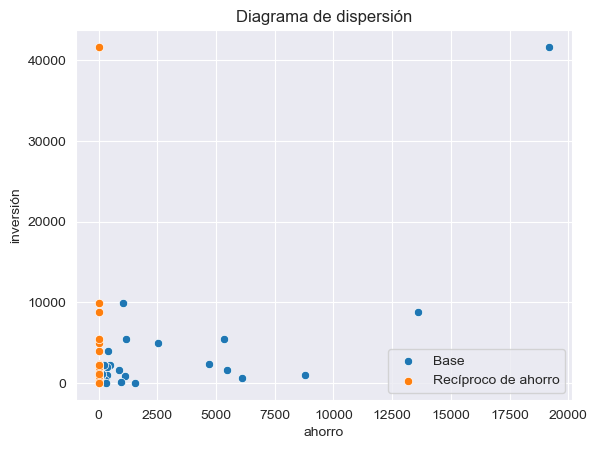

In [34]:
# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the first scatter plot
sns.scatterplot(data=df4, x='ahorro', y='inversión', ax=ax, label='Base')

# Plot the second scatter plot
sns.scatterplot(data=df4, x='ahorro_inversa', y='inversión', ax=ax, label='Recíproco de ahorro')

# Add a legend to the plot
ax.legend()

# Add title and labels
ax.set_title('Diagrama de dispersión')

Text(0.5, 0.98, 'Diagrama de dispersión')

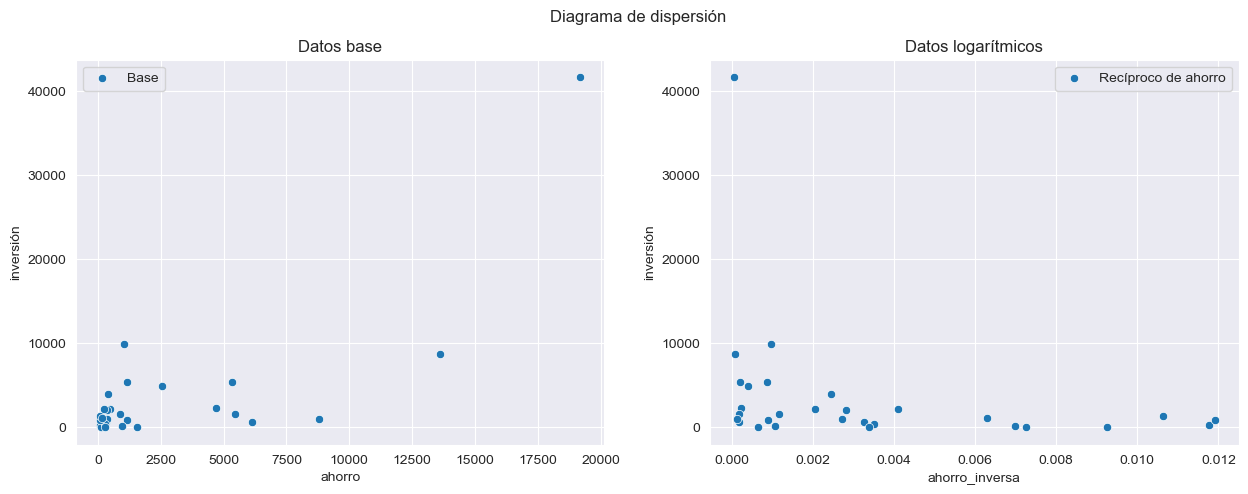

In [35]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first scatter plot
sns.scatterplot(data=df4, x='ahorro', y='inversión', ax=ax[0], label='Base')
ax[0].set_title("Datos base")

# Plot the second scatter plot
sns.scatterplot(data=df4, x='ahorro_inversa', y='inversión', ax=ax[1], label='Recíproco de ahorro')
ax[1].set_title("Datos logarítmicos")

# Set a general title for the figure
fig.suptitle('Diagrama de dispersión')

In [36]:
model_df4= (
    smf.ols(
        formula='inversión~ahorro_inversa',
        data=df4
    )
    .fit()
)
model_df4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.049     
Dependent Variable:      inversión            AIC:                    602.2975  
Date:                    2024-09-01 11:18     BIC:                    605.0321  
No. Observations:        29                   Log-Likelihood:         -299.15   
Df Model:                1                    F-statistic:            2.455     
Df Residuals:            27                   Prob (F-statistic):     0.129     
R-squared:               0.083                Scale:                  5.7341e+07
--------------------------------------------------------------------------------
                  Coef.       Std.Err.     t    P>|t|      [0.025       0.975]  
--------------------------------------------------------------------------------
Intercept         5470.2558   1888.9904  2.8959 0.0074     1594.3677   9346.1439
ahorro_inversa -601527.6280 383878.2472 -1.5670 0.1288 -1389180.7303 186125.4743
--------------------------------------------------------------------------------
Omnibus:                  59.403            Durbin-Watson:               1.859  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            467.364
Skew:                     4.149             Prob(JB):                    0.000  
Kurtosis:                 20.830            Condition No.:               273    
================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

A medida que el valor de $ X $ aumenta significativamente, el término $ \frac{1}{X} $ disminuye progresivamente, acercándose a un valor cercano a cero. Como resultado, la variable $ Y $ tiende a estabilizarse en un valor que corresponde al coeficiente $ \beta_0 $, lo que indica que $ Y $ es asintótico a $ \beta_0 $.

La hipótesis estadística que se desea probar puede expresarse de la siguiente manera:

$$
H_0: \beta_0 \geq 60,000 \quad \text{contra} \quad \text{H}_A: \beta_0 < 60,000
$$

Aquí, $ H_0 $ es la hipótesis nula que sostiene que el valor del coeficiente $ \beta_0 $ es al menos 60,000, mientras que $ H_A $, la hipótesis alternativa, plantea que este coeficiente es menor que 60,000.

Dado que el término $ \frac{1}{X} $ disminuye drásticamente cuando $ X $ es lo suficientemente grande, el impacto de este término en la variable $ Y $ se vuelve insignificante. Por lo tanto, $ Y $ tiende a aproximarse al valor constante $ \beta_0 $, lo que sugiere que, en el límite, $ Y $ se alinea con $ \beta_0 $ de manera asintótica.

En cuanto a la hipótesis a evaluar, planteamos el siguiente escenario: la hipótesis nula establece que el coeficiente $ \beta_0 $ es mayor o igual a 60,000, mientras que la hipótesis alternativa propone que $ \beta_0 $ es inferior a este umbral. Este contraste de hipótesis permitirá determinar si hay suficiente evidencia estadística para concluir que $ \beta_0 $ es efectivamente menor que 60,000, lo cual sería un hallazgo significativo en el contexto del modelo.

#### Pruebe la validez estadística de la siguiente afirmación: “Si el nivel de ahorro es muy grande el nivel de inversión no superara los 60,000 mdcop  en Colombia” (Utilice un nivel de significancia del 5%)

La hipótesis alternativa es:

In [37]:
b1_df4 : float = model_df4.params['ahorro_inversa']
b0_df4 : float = model_df4.params['Intercept']
se_x_df4 = model_df4.bse['Intercept']
print(f"El estimador del coeficiente de la ordenada = b1 = slope = {b1_df4:,.4f}")
print(f"El estimador de la eslasticidad = b0 = intercept = {b0_df4:,.4f}")

El estimador del coeficiente de la ordenada = b1 = slope = -601,527.6280
El estimador de la eslasticidad = b0 = intercept = 5,470.2558


In [38]:
value = 60000

t_statistic = (b0_df4 - value) / se_x_df4
print(f"Valor del estadístico t: {t_statistic:.4f}")

Valor del estadístico t: -28.8671


In [39]:
p_value = t.cdf(t_statistic, df=model_df4.df_resid)
print(f"Valor p: {p_value:.4f}")

Valor p: 0.0000


In [40]:
if  p_value < 0.05 :
    print("Se rechaza H0")
else:
    print("Se acepta H0")

Se rechaza H0


#### Si se tiene un ahorro e inversión de:

- media ahorro	$2,621.86
- media inversion	$3,493.76

La estimación de la elasticidad para e modelo reciproco es  (responda a 4 decimales) 

La elasticidad mide el cambio porcentual en la variable $ Y $ que ocurre cuando la variable $ X $ experimenta un incremento del 1%. Matemáticamente, la elasticidad $ E $ se representa como:

Al calcular la derivada correspondiente en el caso del modelo recíproco, la elasticidad se obtiene de la siguiente manera:

La elasticidad se refiere a cómo una pequeña variación porcentual en la variable independiente $ X $ influye proporcionalmente en la variable dependiente $ Y $. Esta relación se describe mediante el valor de $ E $, que se puede formular así:

$$
E = \frac{dY}{dX} \cdot \frac{X}{Y}
$$

En el contexto de un modelo recíproco, al derivar $ Y $ respecto a $ X $, obtenemos que la elasticidad es:

$$
E = -\beta_1 \frac{1}{X^2} \cdot \frac{X}{Y} = - \frac{\beta_1}{X \cdot Y}
$$

Este resultado muestra que, en un modelo recíproco, la elasticidad no solo depende del coeficiente $ \beta_1 $, sino que también está inversamente relacionada con el producto de $ X $ y $ Y $. Esto implica que a medida que $ X $ o $ Y $ aumentan, la elasticidad disminuye, reflejando una relación negativa entre estas variables en términos de elasticidad.

In [41]:
elasticidad = - (b1_df4 / (df4['ahorro'].mean() * df4['inversión'].mean()))
print(f"Elasticidad: {elasticidad:.4f}")

Elasticidad: 0.0657
